In [6]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

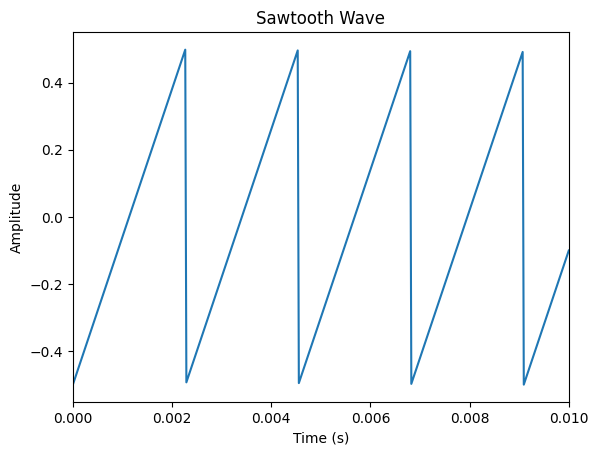

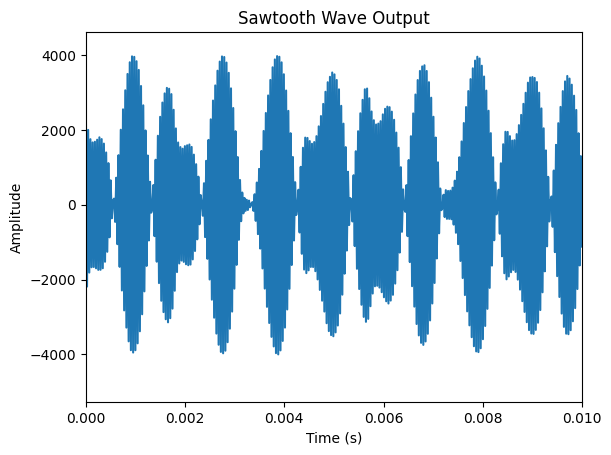

In [7]:
sawtooth_path = "inputs/sawtooth_wave.wav"
sawtooth_output_path = "sawtooth aup/sawtooth_wave_out.wav"

sawtooth_rate, sawtooth = wavfile.read(sawtooth_path)
sawtooth_out_rate, sawtooth_out = wavfile.read(sawtooth_output_path)

#plot sawtooth
t = np.linspace(0, len(sawtooth)/sawtooth_rate, len(sawtooth))
plt.plot(t, sawtooth)
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)
plt.show()

#plot sawtooth output
t = np.linspace(0, len(sawtooth_out)/sawtooth_out_rate, len(sawtooth_out))
plt.plot(t, sawtooth_out)
plt.title("Sawtooth Wave Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)
plt.show()


In [8]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):

    plt.figure(figsize=(8, 6))
    # dibujar magnitud
    plt.subplot(2, 1, 1)
    plt.plot(frequencies, 20 * np.log10(magnitude))
    plt.xscale('log')
    plt.xlim(20,20000)
    plt.title('Magnitude')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')

    # dibujar fase
    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.degrees(phase))
    plt.xscale('log')
    plt.title('Phase')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(20,20000)
    plt.ylabel('Phase (degrees)')
    plt.grid(which='both', axis='both')
    

    plt.tight_layout()

    plt.show()

/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_70203/2441431417.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies, 20 * np.log10(magnitude))


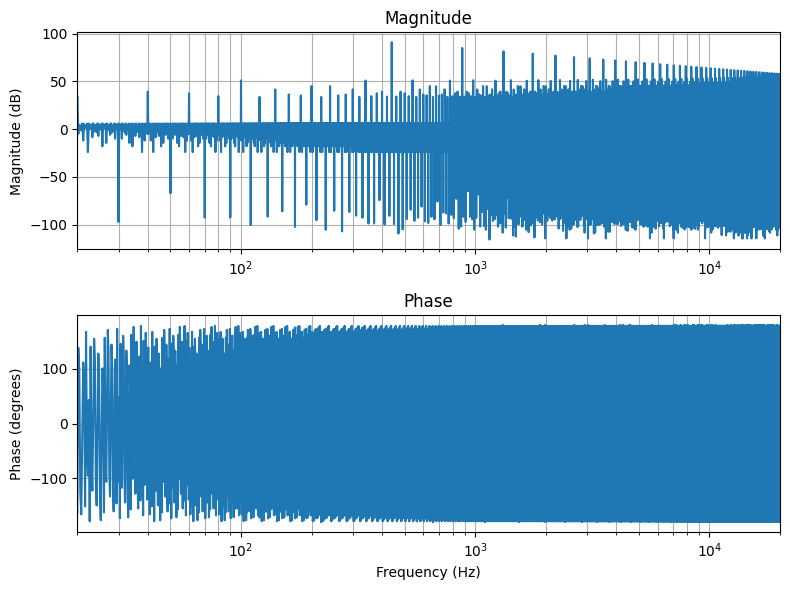

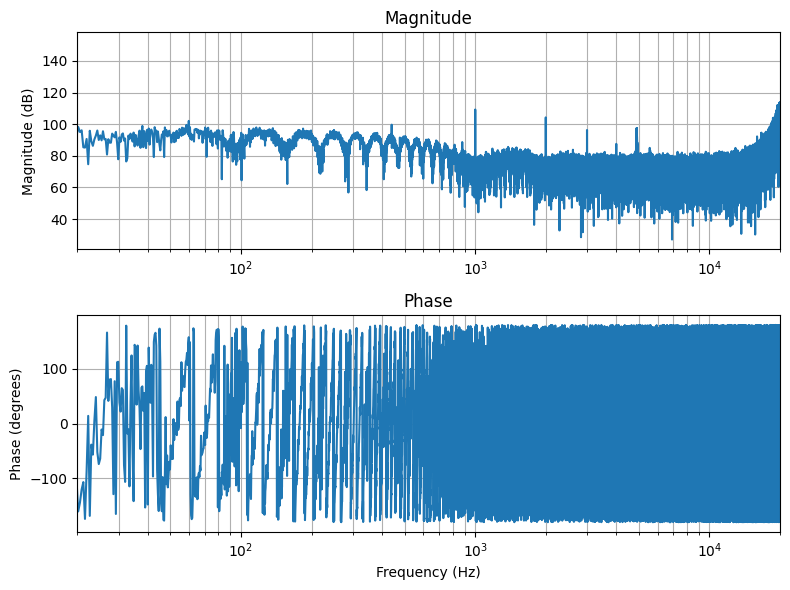

In [9]:
#bode plot sawtooth
frequencies, magnitude, phase = apply_fft(sawtooth, sawtooth_rate)
plot_bode(frequencies, magnitude, phase)

#bode plot sawtooth output
frequencies, magnitude, phase = apply_fft(sawtooth_out, sawtooth_out_rate)
plot_bode(frequencies, magnitude, phase)   

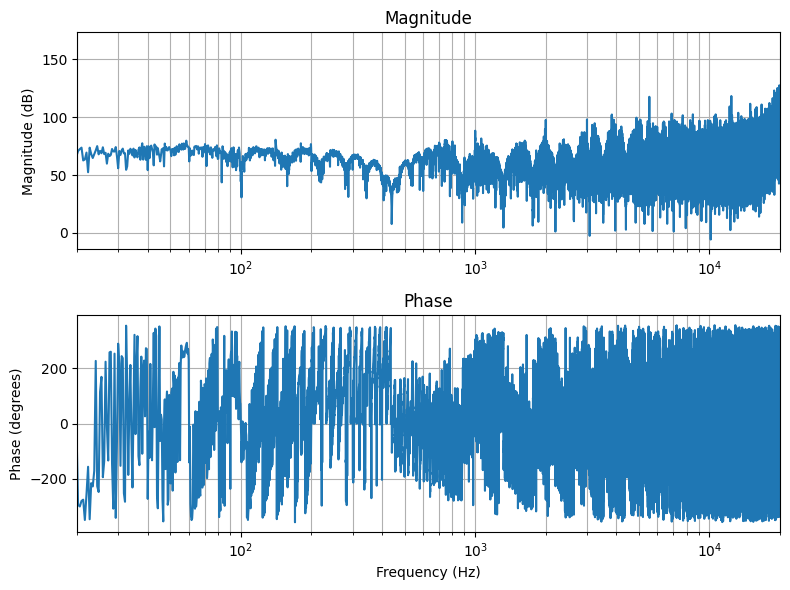

In [10]:
def compute_frequency_responce(sawtooth, sawtooth_out, sample_rate):
    # Perform FFT
    N = len(sawtooth)
    yf = fft(sawtooth)
    yf_out = fft(sawtooth_out)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf_out) / np.abs(yf)
    phase = np.angle(yf_out) - np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
if len(sawtooth) != len(sawtooth_out):
    if len(sawtooth) > len(sawtooth_out):
        sawtooth = sawtooth[:len(sawtooth_out)]
    else:
        sawtooth_out = sawtooth_out[:len(sawtooth)]
        
sawtooth_frequencies, sawtooth_magnitude, sawtooth_phase = compute_frequency_responce(sawtooth, sawtooth_out, sawtooth_rate)
plot_bode(sawtooth_frequencies, sawtooth_magnitude, sawtooth_phase)